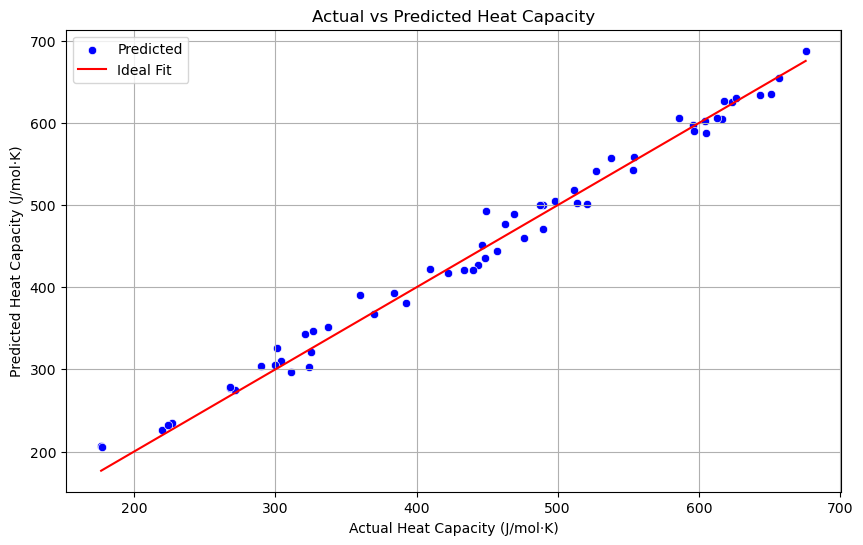

/var/folders/j0/tddr1c_d5xv2vv6jr49zl4lc0000gn/T/ipykernel_88110/443699120.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


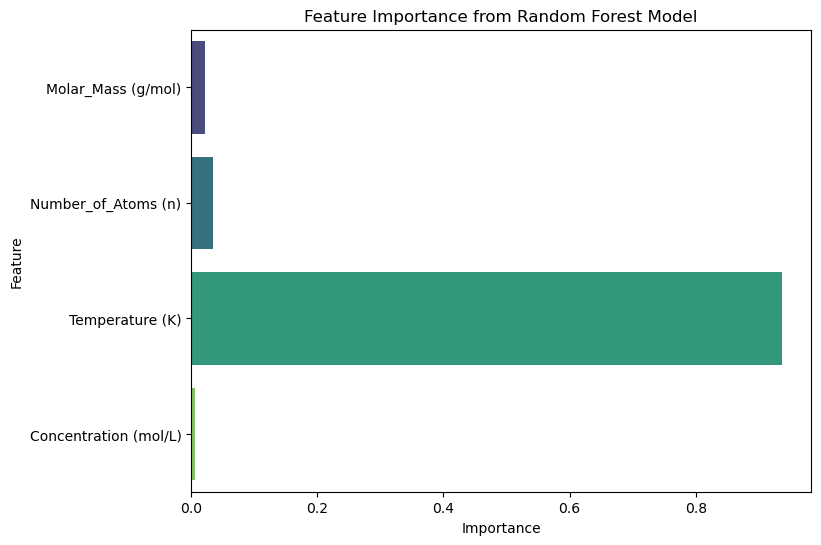

(224.89539409093823, 0.9878798773947979)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('heat_capacity_dataset_updated.csv')

# Define features (X) and target variable (Y)
X = data[["Molar_Mass (g/mol)", "Number_of_Atoms (n)", "Temperature (K)", "Concentration (mol/L)"]]
Y = data["Heat_Capacity (J/mol·K)"]

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Predict on test set
Y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Y_test, y=Y_pred, color="blue", label="Predicted")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', label="Ideal Fit")
plt.xlabel("Actual Heat Capacity (J/mol·K)")
plt.ylabel("Predicted Heat Capacity (J/mol·K)")
plt.title("Actual vs Predicted Heat Capacity")
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Feature Importance
feature_importance = model.feature_importances_
features = X.columns

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance from Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

mse, r2


In [2]:
new_material = np.array([[200,40,300,0.8]])
predicted_heat_capacity = model.predict(new_material)
print(f"{predicted_heat_capacity[0]}")

342.569221629234


/opt/anaconda3/envs/chemprop/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [3]:
import pickle

# Save the trained model to a file
with open('heat_capacity_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)
